In [13]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

def download_stock_data(ticker, timestamp_start, timestamp_end):
    url = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?" \
          f"period1={timestamp_start}&period2={timestamp_end}&interval=1d" \
          f"&events=history&includeAdjustedClose=true"
    df = pd.read_csv(url)
    return df

datetime_start = dt.datetime(2022, 1, 1, 7, 35, 51)
datetime_end = dt.datetime.today()

# Convert to timestamp:
timestamp_start = int(datetime_start.timestamp())
timestamp_end = int(datetime_end.timestamp())

ticker = 'NFLX'

df = download_stock_data(ticker, timestamp_start, timestamp_end)
df = df.set_index('Date')
print(df.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  605.609985  609.989990  590.559998  597.369995  597.369995   
2022-01-04  599.909973  600.409973  581.599976  591.150024  591.150024   
2022-01-05  592.000000  592.840027  566.880005  567.520020  567.520020   
2022-01-06  554.340027  563.359985  542.010010  553.289978  553.289978   
2022-01-07  549.460022  553.429993  538.219971  541.059998  541.059998   

             Volume  
Date                 
2022-01-03  3067500  
2022-01-04  4393100  
2022-01-05  4148700  
2022-01-06  5711800  
2022-01-07  3382900  


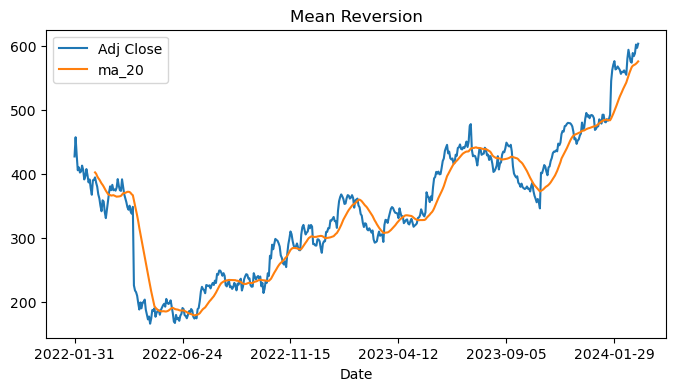

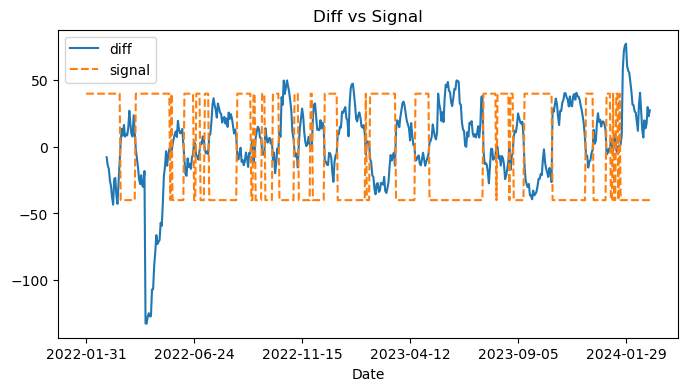

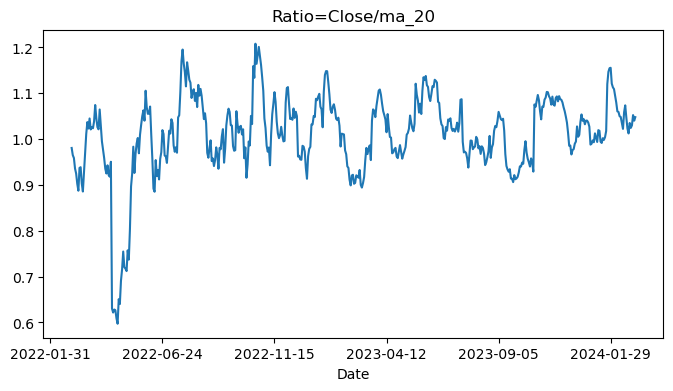

In [22]:
window = 20

df["ma_20"] = df["Adj Close"].rolling(window=window).mean()
df["diff"] = df["Adj Close"] - df["ma_20"]
df['signal'] = np.where(df["diff"] > 0, -1, 1)

figs=(8,4)

df[['Adj Close',"ma_20"]].plot(figsize=figs)
plt.title("Mean Reversion")
plt.show()

df['diff'].plot(figsize=figs)
(40*df['signal']).plot(figsize=figs, linestyle='--')
plt.title("Diff vs Signal")
plt.legend()
plt.show()

(df["Adj Close"]/df["ma_20"] ).plot(figsize=figs)
plt.title("Ratio=Close/ma_20")
plt.show()

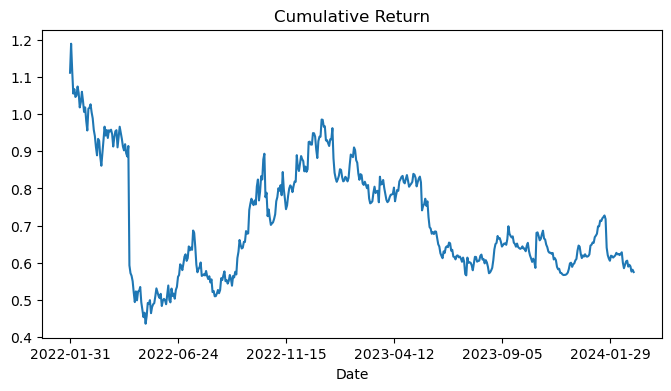

In [15]:
# Backtesting the strategy
# Calculate the daily returns
df['returns'] = df['Adj Close'].pct_change()

# Calculate the strategy returns
df['strategy_returns'] = df['signal'] .shift(1) * df['returns']

# Calculate the cumulative returns
df=df.dropna()
df['cumulative_returns'] = (1 + df['strategy_returns']).cumprod()

figs = (8,4)
# Plot the cumulative returns
df['cumulative_returns'].plot(figsize = figs)
plt.title("Cumulative Return")
plt.show()